In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
#from wrf import getvar, ALL_TIMES
#from netCDF4 import Dataset
from metpy.calc import wind_direction

### For each day in your sims, calculate daily-mean and horizontal-mean U,V averaged from 500-700 hPa. Compute the phase angle of that wind vector in the x,y plane. Divide into octants. Identify days falling into each octants = sub-composite ingredient for 8 different coarse wind-direction phases. (edited) 


### Daily-mean and horizontal-mean U,V averaged from 500-700 hPa [roughly level 11 to 17]. 

### Concatenate all wet season simulations. 

In [92]:
### OBS land use
path = '/jet/home/xjliu/Tanguro_exp/'
simul = ['Tanguro201501','Tanguro201502','Tanguro201601','Tanguro201602']

files = sorted(glob.glob(path+'Tanguro201401/3Dfields_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[10],decode_times=True,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
    U_obs = ds['U']
    V_obs = ds['V']

for filename in files[11:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        U_obs = xarray.concat([U_obs,ds['U']],dim='Day')
        V_obs = xarray.concat([V_obs,ds['V']],dim='Day')

U_obs_mean_all = U_obs[:,11:18,:,:].mean(('Time','bottom_top'))
V_obs_mean_all = V_obs[:,11:18,:,:].mean(('Time','bottom_top'))  ## daily average and 500-700hPa average

del U_obs
del V_obs

#####
for ii in range(3):
    year=simul[ii][7:11]
    month=simul[ii][11:13]
    filename_all = path+simul[ii]+'/'+'3Dfields_d01_'+year+'-'+month+'-*00:00:00'
    files = sorted(glob.glob(filename_all))
    
    with xarray.open_dataset(files[10],decode_times=True,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
        U_obs = ds['U']
        V_obs = ds['V']
    
    for file in files[11:21]:  # start from Day 11
        with xarray.open_dataset(file,decode_times=True,
                             mask_and_scale='True') as ds:
            U_obs = xarray.concat([U_obs,ds['U']],dim='Day')
            V_obs = xarray.concat([V_obs,ds['V']],dim='Day')
        
    U_obs_mean = U_obs[:,11:18,:,:].mean(('Time','bottom_top'))
    V_obs_mean = V_obs[:,11:18,:,:].mean(('Time','bottom_top'))   ## daily average and 500-700hPa average

    U_obs_mean_all = xarray.concat([U_obs_mean_all,U_obs_mean],dim='Day')
    V_obs_mean_all = xarray.concat([V_obs_mean_all,V_obs_mean],dim='Day')
    
    del U_obs_mean
    del V_obs_mean

In [82]:
### OBS land use
path = '/jet/home/xjliu/Tanguro_exp/'
simul = ['Tanguro201501_notrees','Tanguro201502_notrees','Tanguro201601_notrees','Tanguro201602_notrees']

files = sorted(glob.glob(path+'Tanguro201401_notrees/3Dfields_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[10],decode_times=True,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
    U_notrees = ds['U']
    V_notrees = ds['V']

for filename in files[11:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        U_notrees = xarray.concat([U_notrees,ds['U']],dim='Day')
        V_notrees = xarray.concat([V_notrees,ds['V']],dim='Day')

U_notrees_mean_all = U_notrees[:,11:18,:,:].mean(('Time','bottom_top'))
V_notrees_mean_all = V_notrees[:,11:18,:,:].mean(('Time','bottom_top'))  ## daily average and 500-700hPa average

#####
for ii in range(3):
    year=simul[ii][7:11]
    month=simul[ii][11:13]
    filename_all = path+simul[ii]+'/'+'3Dfields_d01_'+year+'-'+month+'-*00:00:00'
    files = sorted(glob.glob(filename_all))
    
    with xarray.open_dataset(files[10],decode_times=True,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
        U_obs = ds['U']
        V_obs = ds['V']
    
    for file in files[11:21]:  # start from Day 11
        with xarray.open_dataset(file,decode_times=True,
                             mask_and_scale='True') as ds:
            U_obs = xarray.concat([U_obs,ds['U']],dim='Day')
            V_obs = xarray.concat([V_obs,ds['V']],dim='Day')
        
    U_obs_mean = U_obs[:,11:18,:,:].mean(('Time','bottom_top'))
    V_obs_mean = V_obs[:,11:18,:,:].mean(('Time','bottom_top'))   ## daily average and 500-700hPa average

    U_notrees_mean_all = xarray.concat([U_notrees_mean_all,U_obs_mean],dim='Day')
    V_notrees_mean_all = xarray.concat([V_notrees_mean_all,V_obs_mean],dim='Day')
#del U_obs_mean
#del V_obs_mean

In [94]:
from metpy.units import masked_array,units

u = U_obs_mean_all*units.meter/units.second
v = V_obs_mean_all*units.meter/units.second
direction = wind_direction(u[:,:,:-1], v[:,:-1,:], convention='from')
direc_obs = direction.mean(('south_north','west_east_stag'))

u = U_notrees_mean_all*units.meter/units.second
v = V_notrees_mean_all*units.meter/units.second
direction = wind_direction(u[:,:,:-1], v[:,:-1,:], convention='from')
direc_notrees = direction.mean(('south_north','west_east_stag'))

In [95]:
bins = np.linspace(0,360,9)
bins_obs = np.digitize(direc_obs,bins)
bins_notrees = np.digitize(direc_notrees,bins)
print(bins_obs)
#print(bins_notrees)

[3 2 3 3 3 3 4 4 5 5 2 2 3 3 4 4 3 2 2 2 3 3 3 3 3 3 4 3 3 5 5 3 3 2 2 3 4
 4 7 5 6 7 6 6]


In [98]:
files[11:21]

['/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-12_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-13_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-14_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-15_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-16_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-17_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-18_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-19_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-20_00:00:00',
 '/jet/home/xjliu/Tanguro_exp/Tanguro201601/3Dfields_d01_2016-01-21_00:00:00']

## HFX, LH, SWUPB, TSK at noon. Keep the diurnal cycle
#### cat all the files together

In [2]:
path = '/jet/home/xjliu/Tanguro_exp/'

files = sorted(glob.glob(path+'Tanguro201401/wrfout_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[0],decode_times=True,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,:]
    lons = ds['XLONG'][0,:,:]

In [7]:
### OBS land use
path = '/jet/home/xjliu/Tanguro_exp/'
simul = ['Tanguro201501','Tanguro201502','Tanguro201601','Tanguro201602']

files = sorted(glob.glob(path+'Tanguro201401/energyflux_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[10],decode_times=False,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
    U_obs = ds['LH']
    V_obs = ds['HFX']

for filename in files[11:21]:
    with xarray.open_dataset(filename,decode_times=False,
                         mask_and_scale='True') as ds:
        U_obs = xarray.concat([U_obs,ds['LH']],dim='Day')
        V_obs = xarray.concat([V_obs,ds['HFX']],dim='Day')

#####
for ii in range(4):
    year=simul[ii][7:11]
    month=simul[ii][11:13]
    filename_all = path+simul[ii]+'/'+'energyflux_d01_'+year+'-'+month+'-*00:00:00'
    files = sorted(glob.glob(filename_all))
    
    for file in files[10:21]:  # start from Day 11
        with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
            U_obs = xarray.concat([U_obs,ds['LH']],dim='Day')
            V_obs = xarray.concat([V_obs,ds['HFX']],dim='Day')

In [4]:
ii

3

In [122]:
### No trees
path = '/jet/home/xjliu/Tanguro_exp/'
simul = ['Tanguro201501_notrees','Tanguro201502_notrees','Tanguro201601_notrees','Tanguro201602_notrees']

files = sorted(glob.glob(path+'Tanguro201401_notrees/energyflux_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[10],decode_times=True,  # throw away the first 10 days as spin-up
                             mask_and_scale='True') as ds:
    U_notrees = ds['LH']
    V_notrees = ds['HFX']

for filename in files[11:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        U_notrees = xarray.concat([U_notrees,ds['LH']],dim='Day')
        V_notrees = xarray.concat([V_notrees,ds['HFX']],dim='Day')

#####
for ii in range(3):
    year=simul[ii][7:11]
    month=simul[ii][11:13]
    filename_all = path+simul[ii]+'/'+'energyflux_d01_'+year+'-'+month+'-*00:00:00'
    files = sorted(glob.glob(filename_all))
    
    for file in files[10:21]:  # start from Day 11
        with xarray.open_dataset(file,decode_times=True,
                             mask_and_scale='True') as ds:
            U_notrees = xarray.concat([U_notrees,ds['LH']],dim='Day')
            V_notrees = xarray.concat([V_notrees,ds['HFX']],dim='Day')

In [143]:
bins_obs
for bin_val in range(2,8):
    print(U_obs[bins_obs==bin_val,:,:,:].shape)

(8, 24, 80, 80)
(19, 24, 80, 80)
(7, 24, 80, 80)
(5, 24, 80, 80)
(3, 24, 80, 80)
(2, 24, 80, 80)


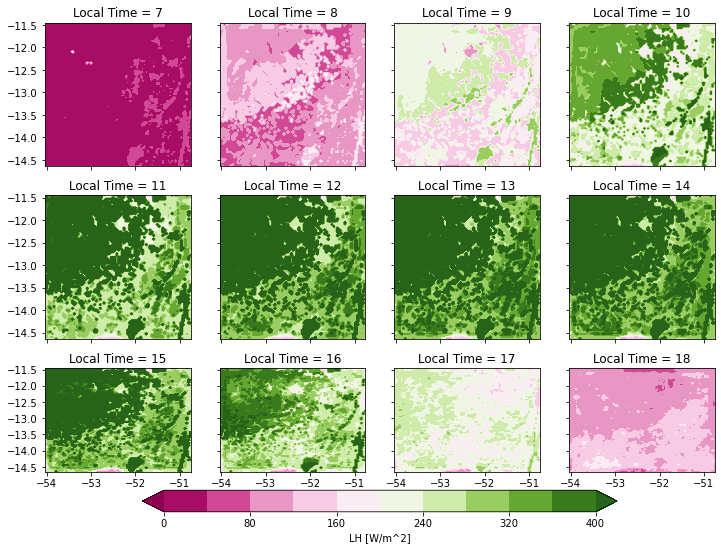

In [141]:
bin_val = 3
LH_sel_obs = U_obs[bins_obs==bin_val,:,:,:].mean('Day')
LH_sel_notrees = U_notrees[bins_obs==bin_val,:,:,:].mean('Day')

fig,axes = plt.subplots(3,4,figsize=(12,9),sharex=True,sharey=True)
axes = axes.ravel()
for ii in np.arange(10,22,1):
    im = axes[ii-10].contourf(lons,lats,LH_sel_obs[ii,:,:],
            cmap='PiYG', extend='both',
            levels=np.linspace(0,400,11))
    axes[ii-10].set_title('Local Time = '+str(ii-3))

fig.colorbar(im, ax=axes[8:12], shrink=0.976,orientation='horizontal',
            label='LH [W/m^2]',
             pad = 0.13,
            fraction=0.15)
#fig.savefig('plot_LH_spatial_diurnal.png',format='png',dpi=400,bbox_inches='tight')

### Diurnal cycle of LH

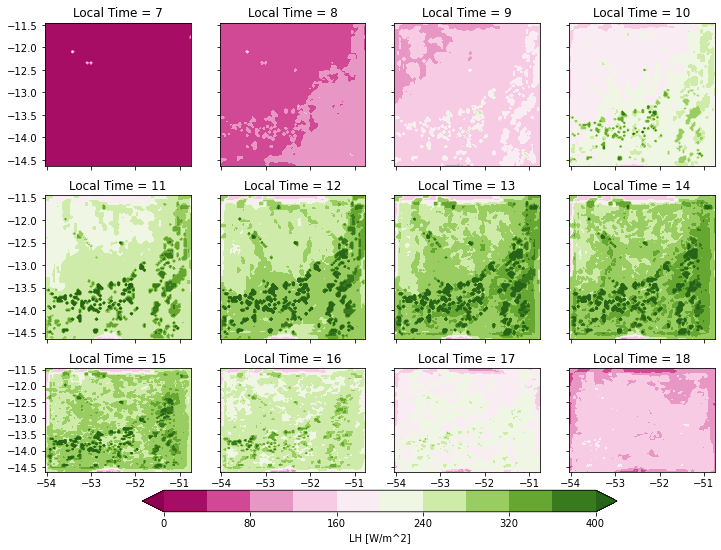

In [142]:
fig,axes = plt.subplots(3,4,figsize=(12,9),sharex=True,sharey=True)
axes = axes.ravel()
for ii in np.arange(10,22,1):
    im = axes[ii-10].contourf(lons,lats,LH_sel_notrees[ii,:,:],
            cmap='PiYG', extend='both',
            levels=np.linspace(0,400,11))
    axes[ii-10].set_title('Local Time = '+str(ii-3))

fig.colorbar(im, ax=axes[8:12], shrink=0.976,orientation='horizontal',
            label='LH [W/m^2]',
             pad = 0.13,
            fraction=0.15)
#fig.savefig('plot_LH_spatial_diurnal.png',format='png',dpi=400,bbox_inches='tight')

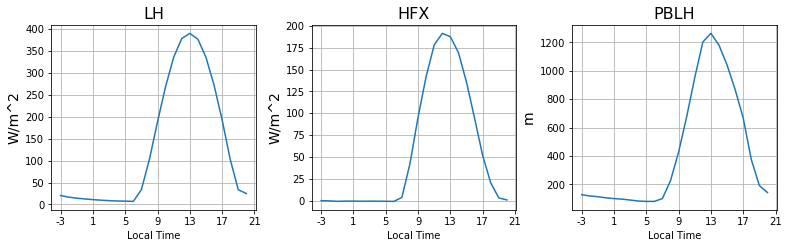

In [118]:
LH_obs_mean_ave = LH_obs_mean.mean(('west_east','south_north'))
HFX_obs_mean_ave = HFX_obs_mean.mean(('west_east','south_north'))
PBLH_obs_mean_ave = PBLH_obs_mean.mean(('west_east','south_north'))

fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True)
fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

units=['W/m^2','W/m^2','m']
for ii,varname in enumerate(['LH','HFX','PBLH']):
    var = varname+'_obs_mean_ave'
    axes[ii].plot(LH_obs_mean_ave.Time,locals()[var])
    axes[ii].set_title(varname,fontsize=16)
    axes[ii].set_ylabel(units[ii],fontsize=14)
    axes[ii].grid()
    axes[ii].set_xticks(np.arange(0,25,4))
    axes[ii].set_xticklabels(np.arange(0,25,4)-3)
    axes[ii].set_xlabel('Local Time')
fig.savefig('plot_diurnalcycle_Jan.png',format='png',dpi=400,bbox_inches='tight')

In [6]:
### All trees
files = sorted(glob.glob(path+'Tanguro201401_alltrees/energyflux_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[5],decode_times=True,
                         mask_and_scale='True') as ds:
    HFX_alltrees = ds['HFX']
    LH_alltrees = ds['LH']
    SWUPB_alltrees = ds['SWUPB']

for filename in files[6:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        HFX_alltrees = xarray.concat([HFX_alltrees,ds['HFX']],dim='Day')
        LH_alltrees = xarray.concat([LH_alltrees,ds['LH']],dim='Day')
        SWUPB_alltrees = xarray.concat([SWUPB_alltrees,ds['SWUPB']],dim='Day')
HFX_alltrees_mean = HFX_alltrees.mean('Day')
LH_alltrees_mean = LH_alltrees.mean('Day')
SWUPB_alltrees_mean = SWUPB_alltrees.mean('Day')

### No trees
files = sorted(glob.glob(path+'Tanguro201401_notrees/energyflux_d01_2014-01-*00:00:00'))
with xarray.open_dataset(files[5],decode_times=True,
                         mask_and_scale='True') as ds:
    HFX_notrees = ds['HFX']
    LH_notrees = ds['LH']
    SWUPB_notrees = ds['SWUPB']

for filename in files[6:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        HFX_notrees = xarray.concat([HFX_notrees,ds['HFX']],dim='Day')
        LH_notrees = xarray.concat([LH_notrees,ds['LH']],dim='Day')
        SWUPB_notrees = xarray.concat([SWUPB_notrees,ds['SWUPB']],dim='Day')
HFX_notrees_mean = HFX_notrees.mean('Day')
LH_notrees_mean = LH_notrees.mean('Day')
SWUPB_notrees_mean = SWUPB_notrees.mean('Day')

### Latent heat

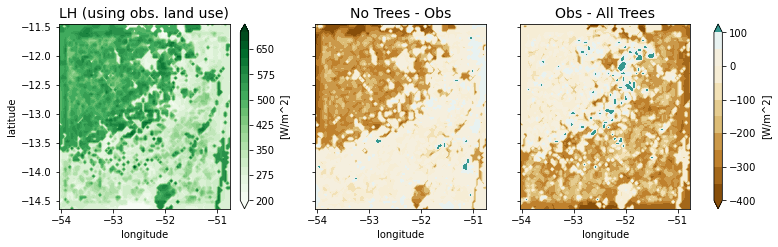

In [133]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG', 56)
newcolors = cmap_old(np.linspace(0.1, 0.8, 26))
newcmp = ListedColormap(newcolors)
norm = colors.TwoSlopeNorm(vmin=-400.,vcenter=0., vmax=400)

localT = 13
im0 = axes[0].contourf(lons,lats,LH_obs_mean[localT+3,:,:],
                levels=np.linspace(200,700,21),
                    extend='both',
                 cmap='Greens')
im1 = axes[1].contourf(lons,lats,LH_notrees_mean[localT+3,:,:]-LH_obs_mean[localT+3,:,:],
                levels=np.linspace(-400,100,11),
                 extend='both',cmap=newcmp,
                       norm=norm)
im1 = axes[2].contourf(lons,lats,LH_obs_mean[localT+3,:,:]-LH_alltrees_mean[localT+3,:,:],
                levels=np.linspace(-400,100,11),
                       norm = norm,
                extend='both',
                 cmap=newcmp)

fig.colorbar(im0,ax=axes[0],label='[W/m^2]')
fig.colorbar(im1,ax=axes[1:3],label='[W/m^2]')
#fig.colorbar(im2,ax=axes[2])

titles=['LH (using obs. land use)','No Trees - Obs','Obs - All Trees']
for ii in range(3):
    axes[ii].set_title(titles[ii],fontsize=14)
    axes[ii].set_xlabel('longitude')
    axes[0].set_ylabel('latitude')
fig.savefig('plot_LH_Jan.png',format='png',dpi=600,bbox_inches='tight')

### The transient response

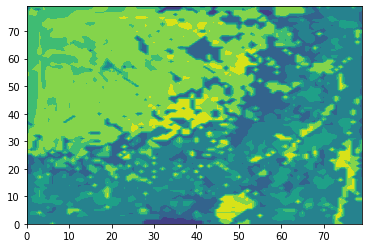

In [8]:
plt.contourf(LH_obs_mean[14,:,:])

Text(0, 0.5, 'LH [W/m^2]')

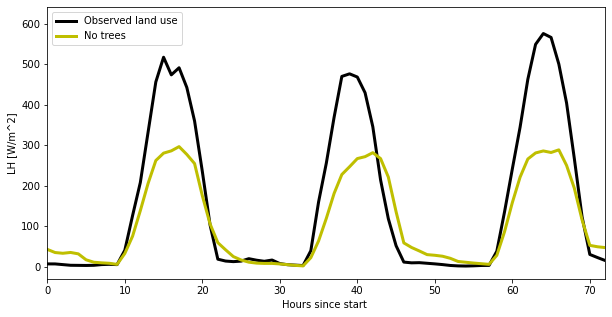

In [43]:
LH_obs_ave = LH_obs[:,:,40:70,0:40].mean(('west_east','south_north'))
LH_notrees_ave = LH_notrees[:,:,40:70,0:40].mean(('west_east','south_north'))
LH_alltrees_ave = LH_alltrees[:,:,40:70,0:40].mean(('west_east','south_north'))
plt.figure(figsize=(10,5))
plt.plot(LH_obs_ave[:72].stack(z=('Day','Time')),'-k',linewidth=3,
         label='Observed land use')
#plt.plot(LH_alltrees_ave[:72].stack(z=('Day','Time')),'-g',linewidth=3,
#         label='All trees')
plt.plot(LH_notrees_ave[:72].stack(z=('Day','Time')),'-y',linewidth=3,
         label='No trees')
plt.xlim([0,72])
plt.legend()
plt.xlabel('Hours since start ')
plt.ylabel('LH [W/m^2]')

## HFX

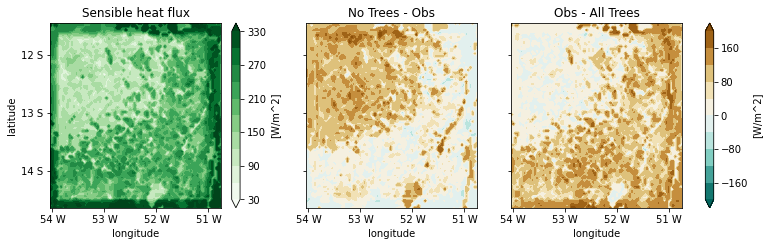

In [157]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.175)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG_r', 256)
newcolors = cmap_old(np.linspace(0.1, 0.9, 256))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-200.,vcenter=0., vmax=20)

localT = 13
varname = 'HFX'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(30,330,11),
                    extend='both',
                 cmap='Greens')
im1 = axes[1].contourf(lons,lats,locals()[varname+'_notrees_mean'][localT+3,:,:]-locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(-200,200,11),
                 extend='both',
                       #norm=norm, 
                       cmap=newcmp)
im1 = axes[2].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:]-locals()[varname+'_alltrees_mean'][localT+3,:,:],
                levels=np.linspace(-200,200,11),
                       #norm = norm,
                extend='both',
                 cmap=newcmp)
fig.colorbar(im0,ax=axes[0],label='[W/m^2]')
fig.colorbar(im1,ax=axes[1:3],label='[W/m^2]')

titles=['Sensible heat flux','No Trees - Obs','Obs - All Trees']
    
for ii in range(3):
    axes[ii].set_title(titles[ii])
    axes[0].set_ylabel('latitude')
    axes[ii].set_xlabel('longitude')
    axes[ii].set_xticks(np.arange(-54,-50,1))
    axes[ii].set_xticklabels(['54 W','53 W','52 W','51 W'])
    axes[ii].set_yticks(np.arange(-14,-11,1))
    axes[ii].set_yticklabels(['14 S','13 S','12 S'])

fig.savefig('plot_HFX_Jan.png',format='png',dpi=600,bbox_inches='tight')


## LH + HFX

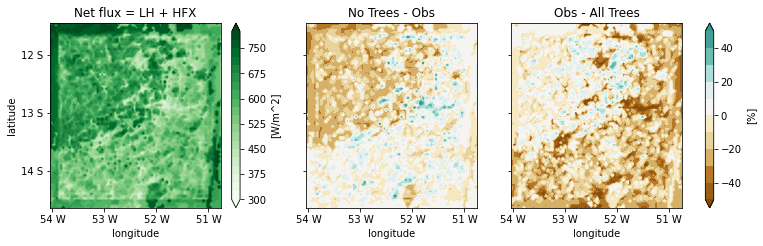

In [164]:
netFLX_notrees_mean = LH_notrees_mean + HFX_notrees_mean
netFLX_alltrees_mean = LH_alltrees_mean + HFX_alltrees_mean
netFLX_obs_mean = LH_obs_mean + HFX_obs_mean

fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG', 56)
newcolors = cmap_old(np.linspace(0.1, 0.8, 26))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-40.,vcenter=0., vmax=40)

localT = 13
varname = 'netFLX'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(300,800,21),
                    extend='both',
                 cmap='Greens')
frac1 = (locals()[varname+'_notrees_mean']-locals()[varname+'_obs_mean'])/locals()[varname+'_obs_mean']*100
frac2 = (locals()[varname+'_obs_mean']-locals()[varname+'_alltrees_mean'])/locals()[varname+'_obs_mean']*100

im1 = axes[1].contourf(lons,lats,frac1[localT+3,:,:],
                levels=np.linspace(-50,50,11),
                 extend='both',
                       #norm=norm, 
                       cmap=newcmp)
im1 = axes[2].contourf(lons,lats,frac2[localT+3,:,:],
                levels=np.linspace(-50,50,11),
                       #norm = norm,
                extend='both',
                 cmap=newcmp)

titles=['Net flux = LH + HFX','No Trees - Obs','Obs - All Trees']
    
fig.colorbar(im0,ax=axes[0],label='[W/m^2]')
fig.colorbar(im1,ax=axes[1:3],label='[%]')
    
for ii in range(3):
    axes[ii].set_title(titles[ii])
    axes[0].set_ylabel('latitude')
    axes[ii].set_xlabel('longitude')
    axes[ii].set_xticks(np.arange(-54,-50,1))
    axes[ii].set_xticklabels(['54 W','53 W','52 W','51 W'])
    axes[ii].set_yticks(np.arange(-14,-11,1))
    axes[ii].set_yticklabels(['14 S','13 S','12 S'])

fig.savefig('plot_netFlux_Jan.png',format='png',dpi=600,bbox_inches='tight')


# SWUPB

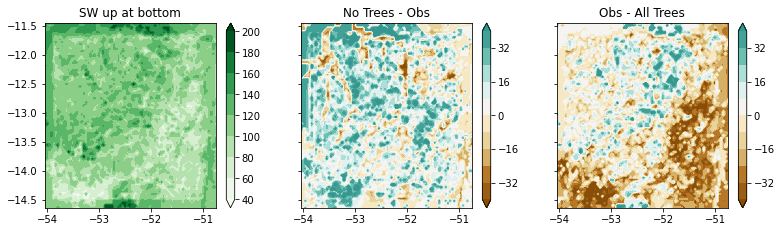

In [166]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG', 56)
newcolors = cmap_old(np.linspace(0.1, 0.8, 26))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-40.,vcenter=0., vmax=40)

localT = 13
varname = 'SWUPB'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(40,200,9),
                    extend='both',
                 cmap='Greens')
im1 = axes[1].contourf(lons,lats,locals()[varname+'_notrees_mean'][localT+3,:,:]-locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(-40,40,11),
                 extend='both',cmap=newcmp,
                       norm=norm)
im2 = axes[2].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:]-locals()[varname+'_alltrees_mean'][localT+3,:,:],
                levels=np.linspace(-40,40,11),
                       norm = norm,
                extend='both',
                 cmap=newcmp)

fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])
fig.colorbar(im2,ax=axes[2])

titles=['SW up at bottom','No Trees - Obs','Obs - All Trees']
for ii in range(3):
    axes[ii].set_title(titles[ii])

In [167]:
ds

<xarray.Dataset>
Dimensions:  (Time: 24, south_north: 80, west_east: 80)
Dimensions without coordinates: Time, south_north, west_east
Data variables: (12/26)
    Times    (Time) |S19 ...
    SWDOWN   (Time, south_north, west_east) float32 ...
    GLW      (Time, south_north, west_east) float32 ...
    SWNORM   (Time, south_north, west_east) float32 ...
    SWUPT    (Time, south_north, west_east) float32 ...
    SWDNT    (Time, south_north, west_east) float32 ...
    ...       ...
    TMN      (Time, south_north, west_east) float32 ...
    UST      (Time, south_north, west_east) float32 ...
    PBLH     (Time, south_north, west_east) float32 ...
    HFX      (Time, south_north, west_east) float32 ...
    QFX      (Time, south_north, west_east) float32 ...
    LH       (Time, south_north, west_east) float32 ...
Attributes: (12/85)
    TITLE:                            OUTPUT FROM WRF V4.3 MODEL
    START_DATE:                      2014-01-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        81
    SOUTH-NORTH_GRID_DIMENSION:      81
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2